## Load the dataframe

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data_small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [3]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


## Show certain rows

In [4]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


## Show certain columns

In [5]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [8]:
df['   TG']

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

In [9]:
df[['   TG','    DATE']]

,TG,DATE
0,21,1860-01-01
1,46,1860-01-02
2,31,1860-01-03
3,37,1860-01-04
4,31,1860-01-05
...,...,...
59316,-9999,2022-05-27
59317,-9999,2022-05-28
59318,-9999,2022-05-29
59319,-9999,2022-05-30


## Simple statistics and filtering

In [12]:
df.loc[df['   TG']!=-9999]
# df.loc[condition] function uses this boolean series to select all the rows in the dataframe where the condition is True
# i.e., here the value in the specified column is not -9999.

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0
53656,1,35381,2006-11-27,70,0
53657,1,35381,2006-11-28,71,0
53658,1,35381,2006-11-29,63,0


In [15]:
df.loc[df['   TG']!=-9999]['   TG'].mean()/10
# df.loc[df['   TG']!=-9999] returns all the dataframe in the specified column is not -9999.
# df.loc[df['   TG']!=-9999]['   TG'] returns the specified column of the specified dataframe
# mean temperature = average value

6.360787526128467

In [16]:
df.loc[df['   TG']!=-9999]['   TG'].max()/10

26.2

In [17]:
df.loc[df['   TG']!=-9999]['   TG'].min()/10

-28.8

<AxesSubplot:>

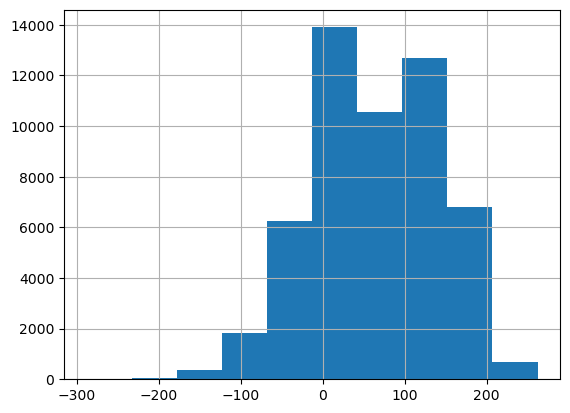

In [18]:
df.loc[df['   TG']!=-9999]['   TG'].hist()
# to create histogram

## Get certain cells

In [22]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [23]:
df['   TG']

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

In [25]:
df[['   TG','    DATE']]

,TG,DATE
0,21,1860-01-01
1,46,1860-01-02
2,31,1860-01-03
3,37,1860-01-04
4,31,1860-01-05
...,...,...
59316,-9999,2022-05-27
59317,-9999,2022-05-28
59318,-9999,2022-05-29
59319,-9999,2022-05-30


In [27]:
df.loc[df['    DATE']=="1860-01-01"]

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0


In [28]:
type(df.loc[df['    DATE']=="1860-01-01"])

pandas.core.frame.DataFrame

In [29]:
df.loc[df['    DATE']=="1860-01-01"]['   TG']

0    21
Name:    TG, dtype: int64

In [31]:
df.loc[df['    DATE']=="1860-01-01"]['   TG'].squeeze()/10

2.1

In [33]:
df.loc[df['   TG']==df['   TG'].max()]

,STAID,SOUID,DATE,TG,Q_TG
3150,1,35381,1868-08-16,262,0


In [35]:
df.loc[df['   TG']==df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [37]:
df.loc[3, '   TG']

37

## Calculate a column out of the existing column

In [48]:
import numpy as np
df['TG0']=df['   TG'].mask(df['   TG']==-9999, np.nan)
# .mask(condition) - read the dataframe without the columns where condition is true
# np.nan - symbolise that non values in Numpy
# so here we are replacing all those values with this special non value
# non value for no data

In [49]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Fahrenheit,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


In [44]:
df['TG']=df['TG0']/10

In [45]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Fahrenheit,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,-1767.82,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,-1767.82,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,-1767.82,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,-1767.82,NaN


In [46]:
df['Fahrenheit']=df['TG']* 9/5 + 32
# Temperature in degrees Fahrenheit (°F) = (Temperature in degrees Celsius (°C) * 9/5) + 32.

In [47]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Fahrenheit,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


## Plotting

<AxesSubplot:>

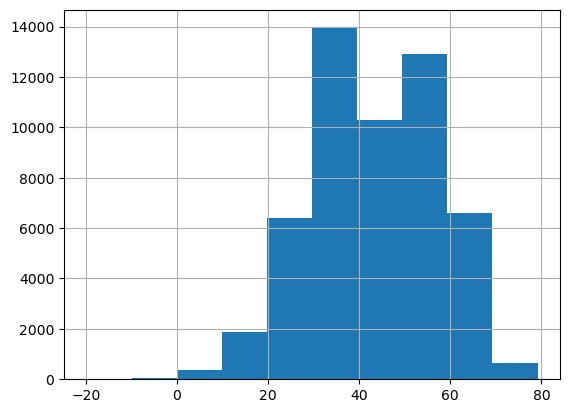

In [51]:
df['Fahrenheit'].hist()

<AxesSubplot:>

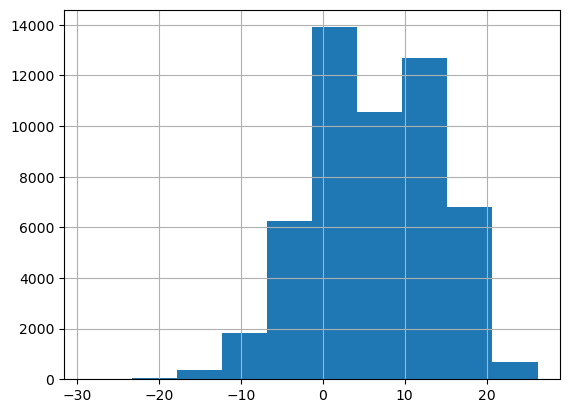

In [52]:
df['TG'].hist()

<AxesSubplot:xlabel='    DATE'>

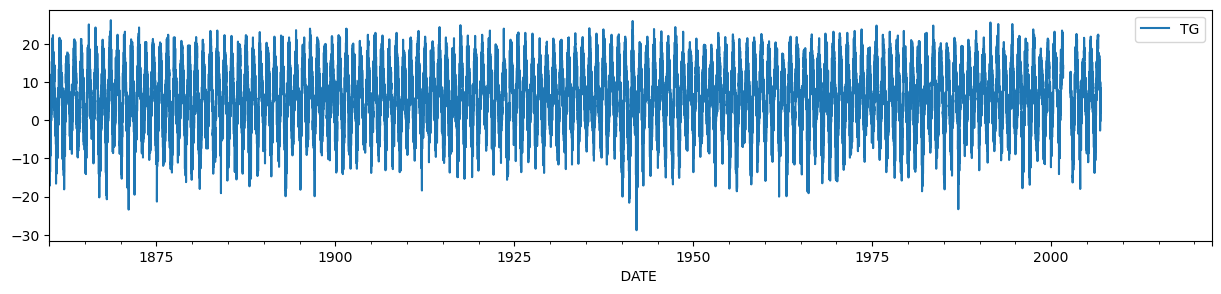

In [55]:
df.plot(x='    DATE', y='TG', figsize=(15, 3))
# figsize stands for figure size
# 15 stands for horizontal
# 3 stands for vertical

<AxesSubplot:xlabel='    DATE'>

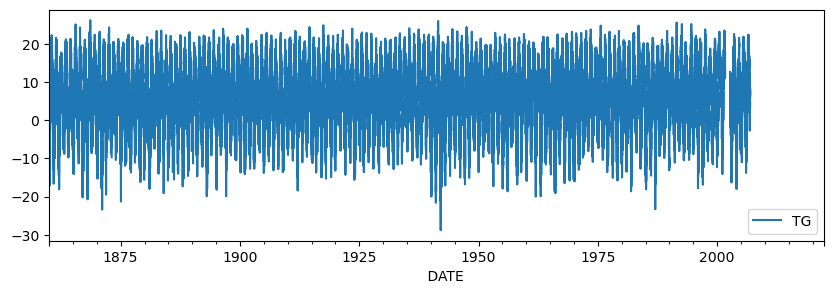

In [56]:
df.plot(x='    DATE', y='TG', figsize=(10, 3))

<AxesSubplot:xlabel='    DATE'>

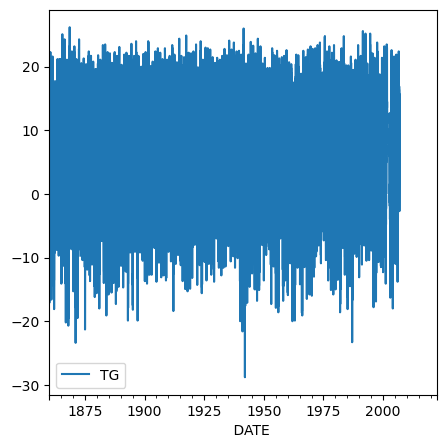

In [57]:
df.plot(x='    DATE', y='TG', figsize=(5, 5))

<AxesSubplot:xlabel='    DATE'>

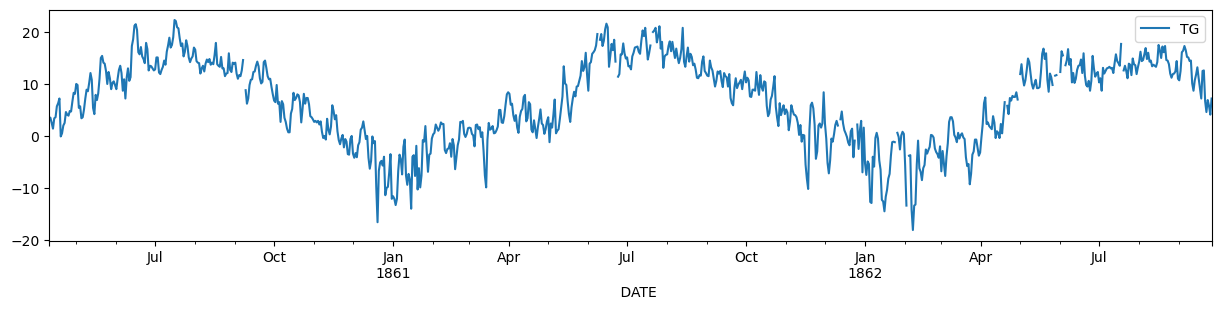

In [58]:
df[100:1000].plot(x='    DATE', y='TG', figsize=(15, 3))
# from row 100 to 1000